In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
from sklearn.linear_model import LogisticRegression, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC

In [2]:
pd.set_option('display.max_columns', None)

# Data Extraction

In [3]:
census=pd.read_csv(r"data_census.csv")
census.head(5)

,Unnamed: 0,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AGI,*(pred),AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FEDTAX,GRINGREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,FATHER,MOTHER,SELF,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,INCOME
0,52591,42.0,Private,29,31,High school graduate,NaN,0,NaN,Not in universe,Married-civilian spouse present,Transportation,Other service,White,All other,Male,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,541.06,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52.0,95,0
1,142526,56.0,Not in universe,0,0,High school graduate,NaN,0,NaN,Not in universe,Separated,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Nonfamily householder,Householder,1060.97,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
2,112987,69.0,Not in universe,0,0,High school graduate,NaN,0,NaN,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both 65+,Not in universe,Not in universe,Householder,Householder,1639.85,?,?,?,Not in universe under 1 year old,?,0,Not in universe,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0.0,95,0
3,27075,10.0,Not in universe,0,0,Children,NaN,0,NaN,Not in universe,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,625.14,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0.0,95,0
4,96695,34.0,Private,4,34,High school graduate,NaN,0,NaN,Not in universe,Never married,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,5438.96,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,13.0,95,0


We have in total 5000 records and 45 features.

In [4]:
census.shape

(5000, 45)

# Handling missing values 

In [5]:
print("Percentage missing values across the dataset: %5.4f" % (census.isna().mean().mean()*100),"%", sep='')

Percentage missing values across the dataset: 4.4960%


Apart from NaN values there are many more missing values as well which are represented by "?" in data. Lets see how many columns have that.

In [6]:
lst_na_columns = []
for col in census.columns.tolist():
    if census[col].isna().any() or ' ?' in [i for i in census[col].unique().tolist()]:
        lst_na_columns.append(col)

print(lst_na_columns)

['AAGE', 'AGI', 'AHRSPAY', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'FATHER', 'MOTHER', 'SELF', 'WKSWORK']


Lets replace "?" in these columns with NaN and see how much null values do we get overall.

In [7]:
for column in lst_na_columns:
    census[column].replace(' ?', np.nan, inplace= True)

Lets see how many missing values do we have in total now. 13.59% 

In [8]:
print("Percentage missing values across the dataset: %5.4f" % (census.isna().mean().mean()*100),"%", sep='')

Percentage missing values across the dataset: 13.5956%


Lets look into continuous columns columns in dataset

In [9]:
for column in census.columns:
    if census[column].dtype != object:
        print(column,":",census[column].unique())

Unnamed: 0 : [ 52591 142526 112987 ...  89351 148538 131913]
AAGE : [42. 56. 69. 10. 34. 58. 27. 38. 25.  5. 28. nan  3.  8. 15. 81. 19. 46.
 63. 73. 45. 31. 23. 79. 53. 82.  4. 12.  1. 20. 44. 13. 78.  2. 48. 75.
 21. 29. 60. 55. 50. 77. 51. 37. 47.  6. 70. 54. 59. 57. 62. 17.  7. 67.
 39. 18. 36. 14. 66.  9. 30. 16. 43. 24. 22. 49. 76. 65. 52. 41.  0. 11.
 83. 33. 71. 32. 68. 88. 61. 86. 26. 74. 40. 72. 87. 80. 64. 84. 85. 90.
 89.]
ADTIND : [29  0  4 33 49 22 43 44 23 15 42 35 41 36 19 47 48  1 25  9  6  2 39 50
 13 38 34 46 32 31 45 18  5 37 16  3 40 21 11 12 30  8 27 26 24 20 14  7
 28 17 51]
ADTOCC : [31  0 34 16  3  4 10 29 12 33  8 23 38 27 26 36 28 19  2 43 41 15 32 24
 17 35 42 45 25 30 14 37 44  7 39 21 18 13 11 22 40  5  1  9 20  6 46]
AGI : [nan]
*(pred) : [   0 1607  900 1130  800  490 2000  825 1780 1910 1800  950  300  689
  700  500  600 1370  725 1250  435  702  447  425 2019  850 1700  450
  525 1500 1100 1000  955 1228 1050 2700  995  650  580 1630  550  840
 1725 2

We see that 20 columns are of continuous type. We'll drop all those columns which have all nans or single value.

In [10]:
lst_columns_to_drop = []
for column in census.columns.tolist():
    if census[column].dtype != object and census[column].notna().any() == False:
        lst_columns_to_drop.append(column)

These columns are completely null. Lets drop them

In [11]:
lst_columns_to_drop

['AGI', 'AHRSPAY', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [12]:
census.drop(columns=lst_columns_to_drop, inplace = True)

Lets drop YEAR as it has only one value and "Unnamed: 0", "*(pred)" as they are just ids and hence will not play any role in machine learning modeling

In [13]:
census.drop(columns = ["YEAR", "Unnamed: 0", "*(pred)"], inplace = True)

# Cleaning continuous features

Lets replace missing values in continuous columns with their means.

In [14]:
for column in census.columns.tolist():
    if census[column].isna().any() == True:
        print(column,":",census[column].unique())

AAGE : [42. 56. 69. 10. 34. 58. 27. 38. 25.  5. 28. nan  3.  8. 15. 81. 19. 46.
 63. 73. 45. 31. 23. 79. 53. 82.  4. 12.  1. 20. 44. 13. 78.  2. 48. 75.
 21. 29. 60. 55. 50. 77. 51. 37. 47.  6. 70. 54. 59. 57. 62. 17.  7. 67.
 39. 18. 36. 14. 66.  9. 30. 16. 43. 24. 22. 49. 76. 65. 52. 41.  0. 11.
 83. 33. 71. 32. 68. 88. 61. 86. 26. 74. 40. 72. 87. 80. 64. 84. 85. 90.
 89.]
FATHER : [' United-States' nan ' South Korea' ' Mexico' ' Germany' ' Italy'
 ' Taiwan' ' Portugal' ' China' ' England' ' Scotland' ' Puerto-Rico'
 ' Philippines' ' Columbia' ' Hong Kong' ' Canada' ' Guatemala' ' Haiti'
 ' El-Salvador' ' Dominican-Republic' ' Outlying-U S (Guam USVI etc)'
 ' Hungary' ' Jamaica' ' Cuba' ' Nicaragua' ' Iran' ' Ecuador' ' Poland'
 ' France' ' Peru' ' Cambodia' ' India' ' Ireland' ' Trinadad&Tobago'
 ' Greece' ' Vietnam' ' Thailand' ' Japan' ' Laos' ' Honduras'
 ' Holand-Netherlands' ' Yugoslavia']
MOTHER : [' United-States' nan ' South Korea' ' Mexico' ' England' ' Taiwan'
 ' Portugal'

We have two features viz. 'AAGE', 'WKSWORK' which have NaN values. Lets impute them with their means.

In [15]:
census[['AAGE', 'WKSWORK']] = census[['AAGE', 'WKSWORK']].replace(np.nan, census[['AAGE', 'WKSWORK']].mean())

We now have all continuous features cleaned

In [16]:
census.shape

(5000, 36)

# Cleaning categorical features

Lets look into categorical features of the dataset and do the feature engineering as required

In [17]:
for column in census.columns.tolist():
    if census[column].dtype == object:
        print(column,":",census[column].unique())

ACLSWKR : [' Private' ' Not in universe' ' Self-employed-incorporated'
 ' Federal government' ' Local government'
 ' Self-employed-not incorporated' ' State government' ' Never worked'
 ' Without pay']
AHGA : [' High school graduate' ' Children'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Some college but no degree'
 ' Associates degree-academic program' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' 11th grade' ' 10th grade'
 ' Associates degree-occup /vocational' ' 1st 2nd 3rd or 4th grade'
 ' 9th grade' ' 5th or 6th grade'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 12th grade no diploma'
 ' Doctorate degree(PhD EdD)' ' Less than 1st grade']
AHSCOL : [' Not in universe' ' College or university' ' High school']
AMARITL : [' Married-civilian spouse present' ' Separated' ' Never married'
 ' Divorced' ' Widowed' ' Married-spouse absent'
 ' Married-A F spouse present']
AMJIND : [' Transportation' ' Not in universe or children' ' Construction'
 ' Retail trade' ' Public administra

In total we have 24 categorical columns. Lets see how many of them have NaN values - Only 3

In [18]:
for column in census.columns.tolist():
    if census[column].dtype == object and census[column].isna().any() == True:
        print(column,":",census[column].unique())

FATHER : [' United-States' nan ' South Korea' ' Mexico' ' Germany' ' Italy'
 ' Taiwan' ' Portugal' ' China' ' England' ' Scotland' ' Puerto-Rico'
 ' Philippines' ' Columbia' ' Hong Kong' ' Canada' ' Guatemala' ' Haiti'
 ' El-Salvador' ' Dominican-Republic' ' Outlying-U S (Guam USVI etc)'
 ' Hungary' ' Jamaica' ' Cuba' ' Nicaragua' ' Iran' ' Ecuador' ' Poland'
 ' France' ' Peru' ' Cambodia' ' India' ' Ireland' ' Trinadad&Tobago'
 ' Greece' ' Vietnam' ' Thailand' ' Japan' ' Laos' ' Honduras'
 ' Holand-Netherlands' ' Yugoslavia']
MOTHER : [' United-States' nan ' South Korea' ' Mexico' ' England' ' Taiwan'
 ' Portugal' ' China' ' Germany' ' Canada' ' Puerto-Rico' ' Philippines'
 ' Columbia' ' Hong Kong' ' El-Salvador' ' Guatemala' ' Haiti' ' Ireland'
 ' Dominican-Republic' ' Outlying-U S (Guam USVI etc)' ' India' ' Jamaica'
 ' Cuba' ' Italy' ' Nicaragua' ' Scotland' ' Holand-Netherlands' ' Iran'
 ' Ecuador' ' Poland' ' Peru' ' Cambodia' ' Trinadad&Tobago' ' France'
 ' Greece' ' Thailand' '

Lets impute NaNs in these columns with modes values of respective columns

In [19]:
census[['FATHER', 'MOTHER', 'SELF']] = census[['FATHER', 'MOTHER', 'SELF']].replace(np.nan, census[['FATHER', 'MOTHER', 'SELF']].mode())

Columns GRINGREG, GRINST, MIGSAME have only single value. We can omit them from our model

In [20]:
census.drop(columns = ["GRINGREG", "GRINST", "MIGSAME"], inplace = True)

In [21]:
print("Total NA values after cleaning:",census.isna().sum().sum())

Total NA values after cleaning: 0


Now only last step remaining before running the models which is doing one hot encoding of categorical/nominal columns

In [22]:
census = pd.get_dummies(census, drop_first=True)

In [23]:
census.shape

(5000, 276)

# Data Analysis and Data Visualization

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)

In [25]:
new_df=pd.read_csv(r"data_census.csv")

In [26]:
new_df.corr()

,Unnamed: 0,AAGE,ADTIND,ADTOCC,AGI,*(pred),AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,MARSUPWT,NOEMP,SEOTR,VETYN,WKSWORK,YEAR,INCOME
Unnamed: 0,1.000000,-0.004501,-0.002645,0.005932,NaN,0.008704,NaN,-0.009120,-0.010385,-0.011837,-0.003545,0.003339,-0.020347,0.008984,0.000118,NaN,-0.003006
AAGE,-0.004501,1.000000,0.150357,0.119405,NaN,0.041732,NaN,0.058872,0.075143,0.125177,-0.005295,0.142980,0.001303,0.680771,0.204007,NaN,0.136040
ADTIND,-0.002645,0.150357,1.000000,0.557044,NaN,0.166021,NaN,0.067945,0.046956,0.006459,0.025491,0.646588,0.268218,0.466038,0.745300,NaN,0.194367
ADTOCC,0.005932,0.119405,0.557044,1.000000,NaN,0.195381,NaN,0.000320,0.056064,-0.039281,0.009746,0.500644,0.231464,0.434918,0.672820,NaN,0.027484
AGI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
*(pred),0.008704,0.041732,0.166021,0.195381,NaN,1.000000,NaN,-0.006214,0.000525,-0.006182,0.012522,0.199078,0.025012,0.112770,0.202096,NaN,0.041622
AHRSPAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPGAIN,-0.009120,0.058872,0.067945,0.000320,NaN,-0.006214,NaN,1.000000,-0.011723,0.142435,0.017245,0.048035,0.047193,0.054073,0.084966,NaN,0.260295
CAPLOSS,-0.010385,0.075143,0.046956,0.056064,NaN,0.000525,NaN,-0.011723,1.000000,0.018598,0.017568,0.051311,0.015258,0.067410,0.071813,NaN,0.113867
DIVVAL,-0.011837,0.125177,0.006459,-0.039281,NaN,-0.006182,NaN,0.142435,0.018598,1.000000,-0.008370,0.003092,-0.007248,0.063386,-0.003408,NaN,0.190031


Lets drop fetures that are not helping in correlation matrix

In [27]:
new_df.drop(columns = ["AGI", "AHRSPAY", "*(pred)", "Unnamed: 0", "YEAR"], inplace = True)

### Correlation matrix using Heat map

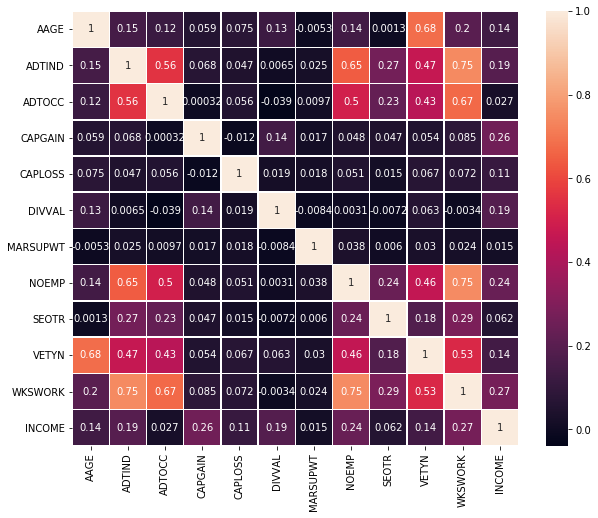

In [28]:
#Correlation coefficients are used in statistics to measure how strong a relationship is between two variables

%matplotlib inline
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidth=0.5)

### Pie chart showing income distribution

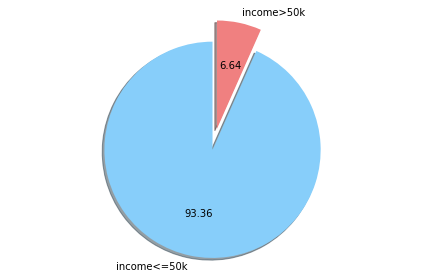

In [29]:
m = 0
l = 0
for i in new_df.INCOME:
    if i == 0:
        l += 1
    if i == 1:
        m += 1

#Set up pie chart
colors = ['lightskyblue', 'lightcoral']
values = [l, m]
labels = ['income<=50k', 'income>50k']
explode = (0, 0.2)
plt.pie(values, labels=labels,explode=explode, colors=colors, shadow=True, startangle=90, autopct='%.2f')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [30]:
census_counts = new_df['AHGA'].value_counts()
census_counts[:20]

 High school graduate                      1238
 Children                                  1194
 Some college but no degree                 690
 Bachelors degree(BA AB BS)                 469
 7th and 8th grade                          198
 10th grade                                 189
 11th grade                                 180
 9th grade                                  172
 Masters degree(MA MS MEng MEd MSW MBA)     167
 Associates degree-occup /vocational        126
 Associates degree-academic program         109
 5th or 6th grade                            79
 12th grade no diploma                       52
 1st 2nd 3rd or 4th grade                    51
 Prof school degree (MD DDS DVM LLB JD)      39
 Doctorate degree(PhD EdD)                   29
 Less than 1st grade                         18
Name: AHGA, dtype: int64

### Distribution of Population across various education levels

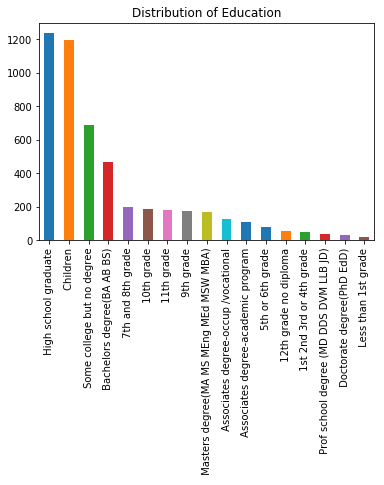

In [31]:
new_df['AHGA'].value_counts().plot.bar(title="Distribution of Education")

### Frequency distribution based on marital status

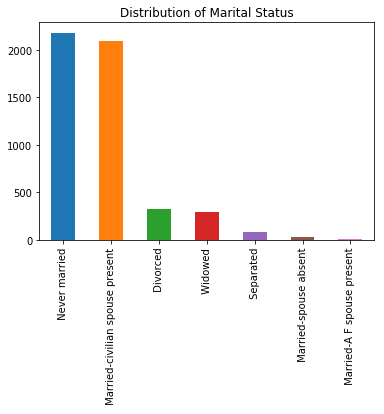

In [32]:
new_df['AMARITL'].value_counts().plot.bar(title="Distribution of Marital Status")

### Barplot displaying count of population across race

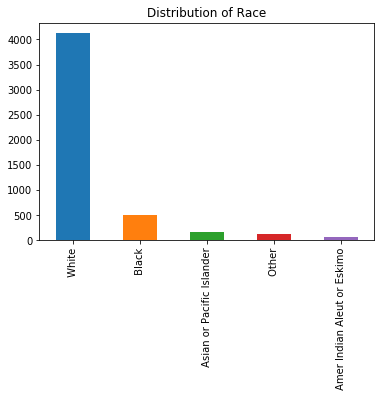

In [33]:
new_df['ARACE'].value_counts().plot.bar(title="Distribution of Race")

### Frequency distribution of gender

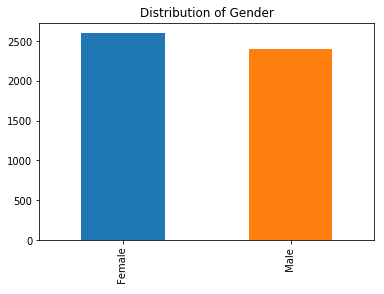

In [34]:
new_df['ASEX'].value_counts().plot.bar(title="Distribution of Gender")

### Frequency distribution of Income

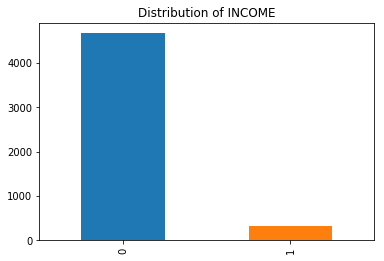

In [35]:
new_df['INCOME'].value_counts().plot.bar(title="Distribution of INCOME")

### Frequency distribution of age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180F14044E0>]],
      dtype=object)

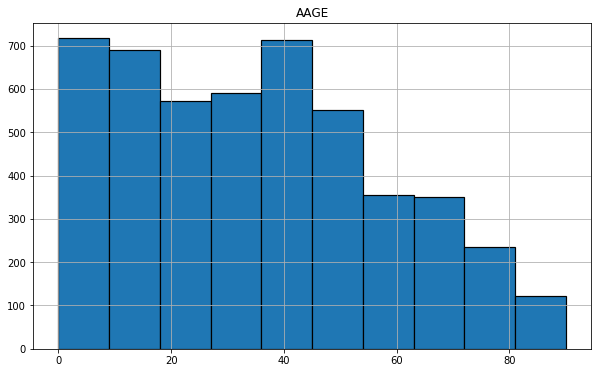

In [36]:
new_df.hist(column = 'AAGE' ,edgecolor='black', linewidth=1.2, figsize = (10,6))

### Box plot showing distribution of age

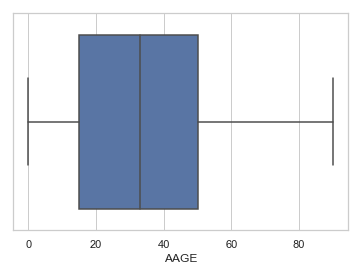

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=new_df["AAGE"])

In [38]:
newdf_rel = new_df[['WKSWORK','ARACE','AAGE']]
newdf_rel.head()

,WKSWORK,ARACE,AAGE
0,52.0,White,42.0
1,0.0,Black,56.0
2,0.0,White,69.0
3,0.0,Asian or Pacific Islander,10.0
4,13.0,White,34.0


### Pair Plot between Weeks worked per year & Age

C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


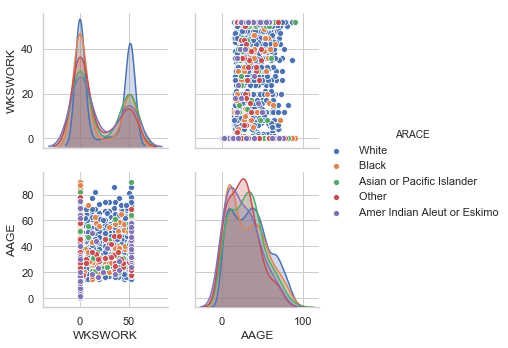

In [39]:
sns.pairplot(newdf_rel, hue='ARACE')

### Stacked bar to show Income values based on SEX and RACE

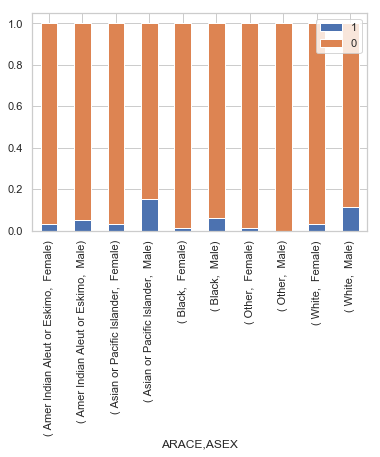

In [40]:
#stacked bar to show Income values between SEX and RACE
df_g = new_df.groupby(['ARACE', 'ASEX'])['INCOME'].agg([np.mean, lambda x: 1-np.mean(x)])
df_g.columns = ['1', '0']
df_g.plot.bar(stacked=True)

### Strip plot showing density of income across different age groups based on gender

Text(0.5, 1.0, 'Income controlled by Age and Gender')

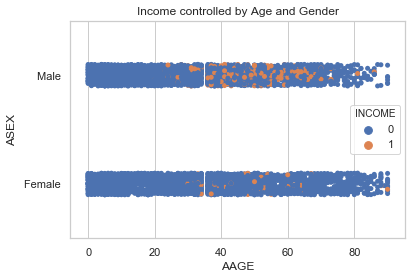

In [41]:
ax = sns.stripplot(x='AAGE', y='ASEX', data=new_df,hue='INCOME')
ax.set_title('Income controlled by Age and Gender')

### Gender distribution based on education levels

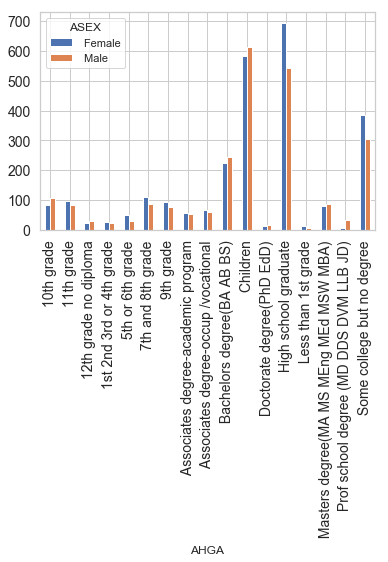

In [42]:
new_df.groupby(["AHGA","ASEX"]).size().unstack("ASEX").plot(kind="bar",fontsize=14)

### Income distribution across gender

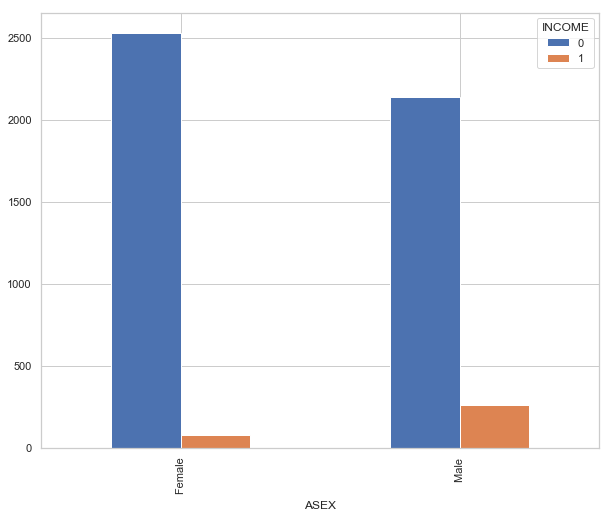

In [43]:
new_df.groupby(['INCOME','ASEX']).size().unstack('INCOME').plot(kind="bar",figsize=(10, 8))

# Model implementation

In [44]:
features = census.columns.tolist()
#features.remove("log_transformed_SalePrice")
features.remove("INCOME")
target = "INCOME"

In [45]:
# Now creating X_train by removing target column
X = census[features].copy()
y = census[target].copy()

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, index=census[features].index, columns=census[features].columns)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
report_df = pd.DataFrame(columns = ["Classifier","Avg train accuracy", "Avg test accuracy", "Avg train AIC", "Avg test AIC", 
                                         "Avg train BIC", "Avg test BIC", "Avg train sensitivity", "Avg test sensitivity",
                                      "Avg train specificity", "Avg test specificity", "Avg train precision for positive class",
                                      "Avg train precision for negative class", "Avg test precision for positive class",
                                      "Avg test precision for negative class","Avg train recall for positive class",
                                        "Avg train recall for negative class", "Avg test recall for positive class",
                                      "Avg test recall for negative class", "Avg train support for positive class",
                                       "Avg train support for negative class", "Avg test support for positive class",
                                      "Avg test support for negative class", "Avg train f1-score for positive class",
                                       "Avg train f1-score for negative class", "Avg test f1-score for positive class",
                                      "Avg test f1-score for negative class", "Best Hyperparameters"])

In [47]:
train_columns = ["Classifier", "Best Hyperparameters", "Avg train accuracy","Avg train AIC", "Avg train BIC", "Avg train sensitivity",
                                      "Avg train specificity", "Avg train precision for positive class",
                                      "Avg train precision for negative class", "Avg train recall for positive class",
                                        "Avg train recall for negative class","Avg train support for positive class",
                                       "Avg train support for negative class","Avg train f1-score for positive class",
                                       "Avg train f1-score for negative class"]

test_columns = ["Classifier", "Best Hyperparameters", "Avg test accuracy","Avg test AIC", "Avg test BIC", "Avg test sensitivity",
                                      "Avg test specificity", "Avg test precision for positive class",
                                      "Avg test precision for negative class", "Avg test recall for positive class",
                                        "Avg test recall for negative class","Avg test support for positive class",
                                       "Avg test support for negative class","Avg test f1-score for positive class",
                                       "Avg test f1-score for negative class"]

# Logistics Regression

In [48]:
parameters = [{'C':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100], 'penalty':['l1','l2']}]

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, scoring='accuracy', cv=3, n_jobs = -1)

grid_search = grid_search.fit(X,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: 0.9452
Grid search best parameters: {'C': 0.8, 'penalty': 'l1'}


C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
kf = KFold(n_splits=3) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
train_AIC_score_list = []
test_AIC_score_list = []
train_BIC_score_list = []
test_BIC_score_list = []
sensitivity_train_list = []
specificity_train_list = []
sensitivity_test_list = []
specificity_test_list = []
precision_train_positive_class = []
precision_train_negative_class = []
precision_test_positive_class = []
precision_test_negative_class = []
recall_train_positive_class = []
recall_train_negative_class = []
recall_test_positive_class = []
recall_test_negative_class = []
support_train_positive_class = []
support_train_negative_class = []
support_test_positive_class = []
support_test_negative_class = []
f1_train_score_positive_class = []
f1_train_score_negative_class = []
f1_test_score_positive_class = []
f1_test_score_negative_class = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    lgr = LogisticRegression(C = grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
    lgr.fit(X_train_cv,y_train_cv)
    train_score_list.append(lgr.score(X_train_cv,y_train_cv))
    test_score_list.append(lgr.score(X_test_cv, y_test_cv))
    
    y_train_preds = lgr.predict(X_train_cv)
    y_test_preds = lgr.predict(X_test_cv)
    
    resid_train = np.array([i for i in y_train_cv.values.tolist()]) - np.array(y_train_preds.tolist())
    resid_test = np.array([i for i in y_test_cv.values.tolist()]) - np.array(y_test_preds.tolist())
    sse_train = sum(resid_train**2)
    sse_test = sum(resid_test**2)
    k = len(X.columns.tolist())
    n_train = y_train_cv.shape[0]
    n_test = y_test_cv.shape[0]

    AIC_train = (2*k) - (2*np.log(sse_train))
    BIC_train = (n_train*np.log(sse_train/n_train)) + (k*np.log(n_train))
    
    AIC_test = (2*k) - (2*np.log(sse_test))
    BIC_test = (n_test*np.log(sse_test/n_test)) + (k*np.log(n_test))
    
    train_AIC_score_list.append(AIC_train)
    train_BIC_score_list.append(BIC_train)
    test_AIC_score_list.append(AIC_test)
    test_BIC_score_list.append(BIC_test)
    
    clf_report_train = classification_report(y_train_cv,y_train_preds,output_dict=True)
    clf_report_test = classification_report(y_test_cv,y_test_preds,output_dict=True)
    
    sensitivity_train_list.append(clf_report_train['1']['recall'])
    specificity_train_list.append(clf_report_train['0']['recall'])
    sensitivity_test_list.append(clf_report_test['1']['recall'])
    specificity_test_list.append(clf_report_test['0']['recall'])
    precision_train_positive_class.append(clf_report_train['1']['precision'])
    precision_train_negative_class.append(clf_report_train['0']['precision'])
    precision_test_positive_class.append(clf_report_test['1']['precision'])
    precision_test_negative_class.append(clf_report_test['0']['precision'])
    recall_train_positive_class.append(clf_report_train['1']['recall'])
    recall_train_negative_class.append(clf_report_train['0']['recall'])
    recall_test_positive_class.append(clf_report_test['1']['recall'])
    recall_test_negative_class.append(clf_report_test['0']['recall'])
    support_train_positive_class.append(clf_report_train['1']['support'])
    support_train_negative_class.append(clf_report_train['0']['support'])
    support_test_positive_class.append(clf_report_test['1']['support'])
    support_test_negative_class.append(clf_report_test['0']['support'])
    f1_train_score_positive_class.append(clf_report_train['1']['f1-score'])
    f1_train_score_negative_class.append(clf_report_train['0']['f1-score'])
    f1_test_score_positive_class.append(clf_report_test['1']['f1-score'])
    f1_test_score_negative_class.append(clf_report_test['0']['f1-score'])

report_df = report_df.append({"Classifier":"LogisticRegression", 
                              "Avg train accuracy":sum(train_score_list) / 3, "Avg test accuracy":sum(test_score_list) / 3, 
                              "Avg train AIC":sum(train_AIC_score_list) / 3, "Avg test AIC":sum(test_AIC_score_list) / 3, 
                              "Avg train BIC":sum(train_BIC_score_list) / 3, "Avg test BIC":sum(test_BIC_score_list) / 3, 
                              "Avg train sensitivity" : sum(sensitivity_train_list) / 3, "Avg test sensitivity" : sum(sensitivity_test_list) / 3, 
                              "Avg train specificity" : sum(specificity_train_list) / 3, "Avg test specificity" : sum(specificity_test_list) / 3,
                              "Avg train precision for positive class":sum(precision_train_positive_class) / 3, "Avg test precision for positive class":sum(precision_train_negative_class) / 3, 
                              "Avg train precision for negative class":sum(precision_test_positive_class) / 3, "Avg test precision for negative class":sum(precision_test_negative_class) / 3,
                              "Avg train recall for positive class":sum(recall_train_positive_class) / 3, "Avg test recall for positive class":sum(recall_train_negative_class) / 3, 
                              "Avg train recall for negative class":sum(recall_test_positive_class) / 3, "Avg test recall for negative class":sum(recall_test_negative_class) / 3,
                              "Avg train support for positive class":sum(support_train_positive_class) / 3, "Avg test support for positive class":sum(support_train_negative_class) / 3, 
                              "Avg train support for negative class":sum(support_test_positive_class) / 3, "Avg test support for negative class":sum(support_test_negative_class) / 3,
                              "Avg train f1-score for positive class":sum(f1_train_score_positive_class) / 3, "Avg test f1-score for positive class":sum(f1_train_score_negative_class) / 3, 
                              "Avg train f1-score for negative class":sum(f1_test_score_positive_class) / 3, "Avg test f1-score for negative class":sum(f1_test_score_negative_class) / 3,
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
report_df[train_columns]

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.951,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108


In [51]:
report_df[test_columns]

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112


Text(0, 0.5, 'LogisticRegression Accuracy')

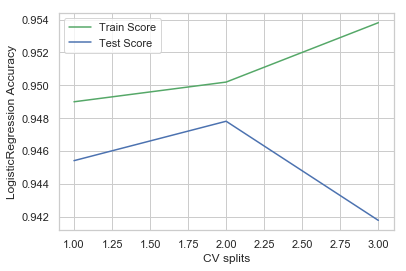

In [52]:
plt.plot([1,2,3], train_score_list, c = 'g', label = 'Train Score')
plt.plot([1,2,3], test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('LogisticRegression Accuracy')

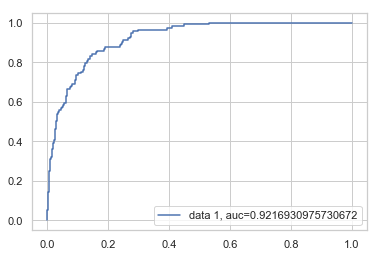

In [53]:
y_pred_proba = lgr.predict_proba(X_test_cv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_cv,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_cv, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
pd.DataFrame(
    confusion_matrix(y_test_cv, y_test_preds),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

,Predicted Income not>50k,Predicted Income>50k
True Income not>50k,1540,13
True Income>50k,84,29


# KNN Classifier

In [55]:
parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]

grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, scoring='accuracy', cv=3, n_jobs = -1)

grid_search = grid_search.fit(X,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: 0.9356
Grid search best parameters: {'n_neighbors': 9}


In [56]:
kf = KFold(n_splits=3) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
train_AIC_score_list = []
test_AIC_score_list = []
train_BIC_score_list = []
test_BIC_score_list = []
sensitivity_train_list = []
specificity_train_list = []
sensitivity_test_list = []
specificity_test_list = []
precision_train_positive_class = []
precision_train_negative_class = []
precision_test_positive_class = []
precision_test_negative_class = []
recall_train_positive_class = []
recall_train_negative_class = []
recall_test_positive_class = []
recall_test_negative_class = []
support_train_positive_class = []
support_train_negative_class = []
support_test_positive_class = []
support_test_negative_class = []
f1_train_score_positive_class = []
f1_train_score_negative_class = []
f1_test_score_positive_class = []
f1_test_score_negative_class = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    knn = KNeighborsClassifier(grid_search.best_params_['n_neighbors'])
    knn.fit(X_train_cv,y_train_cv)
    train_score_list.append(knn.score(X_train_cv,y_train_cv))
    test_score_list.append(knn.score(X_test_cv, y_test_cv))
    
    y_train_preds = knn.predict(X_train_cv)
    y_test_preds = knn.predict(X_test_cv)
    
    resid_train = np.array([i for i in y_train_cv.values.tolist()]) - np.array(y_train_preds.tolist())
    resid_test = np.array([i for i in y_test_cv.values.tolist()]) - np.array(y_test_preds.tolist())
    sse_train = sum(resid_train**2)
    sse_test = sum(resid_test**2)
    k = len(X.columns.tolist())
    n_train = y_train_cv.shape[0]
    n_test = y_test_cv.shape[0]

    AIC_train = (2*k) - (2*np.log(sse_train))
    BIC_train = (n_train*np.log(sse_train/n_train)) + (k*np.log(n_train))
    
    AIC_test = (2*k) - (2*np.log(sse_test))
    BIC_test = (n_test*np.log(sse_test/n_test)) + (k*np.log(n_test))
    
    train_AIC_score_list.append(AIC_train)
    train_BIC_score_list.append(BIC_train)
    test_AIC_score_list.append(AIC_test)
    test_BIC_score_list.append(BIC_test)
    
    clf_report_train = classification_report(y_train_cv,y_train_preds,output_dict=True)
    clf_report_test = classification_report(y_test_cv,y_test_preds,output_dict=True)
    
    sensitivity_train_list.append(clf_report_train['1']['recall'])
    specificity_train_list.append(clf_report_train['0']['recall'])
    sensitivity_test_list.append(clf_report_test['1']['recall'])
    specificity_test_list.append(clf_report_test['0']['recall'])
    precision_train_positive_class.append(clf_report_train['1']['precision'])
    precision_train_negative_class.append(clf_report_train['0']['precision'])
    precision_test_positive_class.append(clf_report_test['1']['precision'])
    precision_test_negative_class.append(clf_report_test['0']['precision'])
    recall_train_positive_class.append(clf_report_train['1']['recall'])
    recall_train_negative_class.append(clf_report_train['0']['recall'])
    recall_test_positive_class.append(clf_report_test['1']['recall'])
    recall_test_negative_class.append(clf_report_test['0']['recall'])
    support_train_positive_class.append(clf_report_train['1']['support'])
    support_train_negative_class.append(clf_report_train['0']['support'])
    support_test_positive_class.append(clf_report_test['1']['support'])
    support_test_negative_class.append(clf_report_test['0']['support'])
    f1_train_score_positive_class.append(clf_report_train['1']['f1-score'])
    f1_train_score_negative_class.append(clf_report_train['0']['f1-score'])
    f1_test_score_positive_class.append(clf_report_test['1']['f1-score'])
    f1_test_score_negative_class.append(clf_report_test['0']['f1-score'])

report_df = report_df.append({"Classifier":"KNNClassifier", 
                              "Avg train accuracy":sum(train_score_list) / 3, "Avg test accuracy":sum(test_score_list) / 3, 
                              "Avg train AIC":sum(train_AIC_score_list) / 3, "Avg test AIC":sum(test_AIC_score_list) / 3, 
                              "Avg train BIC":sum(train_BIC_score_list) / 3, "Avg test BIC":sum(test_BIC_score_list) / 3, 
                              "Avg train sensitivity" : sum(sensitivity_train_list) / 3, "Avg test sensitivity" : sum(sensitivity_test_list) / 3, 
                              "Avg train specificity" : sum(specificity_train_list) / 3, "Avg test specificity" : sum(specificity_test_list) / 3,
                              "Avg train precision for positive class":sum(precision_train_positive_class) / 3, "Avg test precision for positive class":sum(precision_train_negative_class) / 3, 
                              "Avg train precision for negative class":sum(precision_test_positive_class) / 3, "Avg test precision for negative class":sum(precision_test_negative_class) / 3,
                              "Avg train recall for positive class":sum(recall_train_positive_class) / 3, "Avg test recall for positive class":sum(recall_train_negative_class) / 3, 
                              "Avg train recall for negative class":sum(recall_test_positive_class) / 3, "Avg test recall for negative class":sum(recall_test_negative_class) / 3,
                              "Avg train support for positive class":sum(support_train_positive_class) / 3, "Avg test support for positive class":sum(support_train_negative_class) / 3, 
                              "Avg train support for negative class":sum(support_test_positive_class) / 3, "Avg test support for negative class":sum(support_test_negative_class) / 3,
                              "Avg train f1-score for positive class":sum(f1_train_score_positive_class) / 3, "Avg test f1-score for positive class":sum(f1_train_score_negative_class) / 3, 
                              "Avg train f1-score for negative class":sum(f1_test_score_positive_class) / 3, "Avg test f1-score for negative class":sum(f1_test_score_negative_class) / 3,
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

In [57]:
report_df[train_columns]

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.9510,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108
1,KNNClassifier,{'n_neighbors': 9},0.9448,539.571094,-7426.871283,0.261500,0.993357,0.741443,0.522125,0.261500,0.187570,221.333333,110.666667,0.383958,0.274761


In [58]:
report_df[test_columns]

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112
1,KNNClassifier,{'n_neighbors': 9},0.934599,540.619327,-2506.982811,0.187570,0.987797,0.949823,0.944693,0.993357,0.987797,3112.0,1556.0,0.971099,0.965755


Text(0, 0.5, 'KNN Classifier Score')

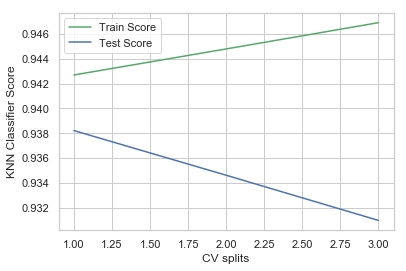

In [59]:
plt.plot([1,2,3],train_score_list, c = 'g', label = 'Train Score')
plt.plot([1,2,3],test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('KNN Classifier Score')

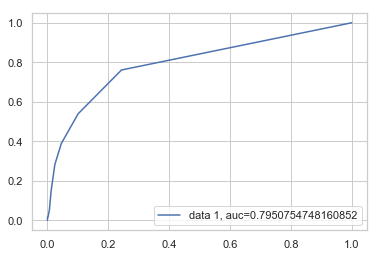

In [60]:
y_pred_proba = knn.predict_proba(X_test_cv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_cv,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_cv, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [61]:
pd.DataFrame(
    confusion_matrix(y_test_cv, y_test_preds),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

,Predicted Income not>50k,Predicted Income>50k
True Income not>50k,1534,19
True Income>50k,96,17


# LINEAR SVC Classifier

In [62]:
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator = LinearSVC(), param_grid = parameters, scoring='accuracy', cv=3, n_jobs = -1)

grid_search = grid_search.fit(X,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: 0.9416
Grid search best parameters: {'C': 0.1}


In [63]:
kf = KFold(n_splits=3) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
train_AIC_score_list = []
test_AIC_score_list = []
train_BIC_score_list = []
test_BIC_score_list = []
sensitivity_train_list = []
specificity_train_list = []
sensitivity_test_list = []
specificity_test_list = []
precision_train_positive_class = []
precision_train_negative_class = []
precision_test_positive_class = []
precision_test_negative_class = []
recall_train_positive_class = []
recall_train_negative_class = []
recall_test_positive_class = []
recall_test_negative_class = []
support_train_positive_class = []
support_train_negative_class = []
support_test_positive_class = []
support_test_negative_class = []
f1_train_score_positive_class = []
f1_train_score_negative_class = []
f1_test_score_positive_class = []
f1_test_score_negative_class = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    lsvc = LinearSVC(C=grid_search.best_params_['C'])
    lsvc.fit(X_train_cv,y_train_cv)
    train_score_list.append(lsvc.score(X_train_cv,y_train_cv))
    test_score_list.append(lsvc.score(X_test_cv, y_test_cv))
    
    y_train_preds = lsvc.predict(X_train_cv)
    y_test_preds = lsvc.predict(X_test_cv)
    
    resid_train = np.array([i for i in y_train_cv.values.tolist()]) - np.array(y_train_preds.tolist())
    resid_test = np.array([i for i in y_test_cv.values.tolist()]) - np.array(y_test_preds.tolist())
    sse_train = sum(resid_train**2)
    sse_test = sum(resid_test**2)
    k = len(X.columns.tolist())
    n_train = y_train_cv.shape[0]
    n_test = y_test_cv.shape[0]

    AIC_train = (2*k) - (2*np.log(sse_train))
    BIC_train = (n_train*np.log(sse_train/n_train)) + (k*np.log(n_train))
    
    AIC_test = (2*k) - (2*np.log(sse_test))
    BIC_test = (n_test*np.log(sse_test/n_test)) + (k*np.log(n_test))
    
    train_AIC_score_list.append(AIC_train)
    train_BIC_score_list.append(BIC_train)
    test_AIC_score_list.append(AIC_test)
    test_BIC_score_list.append(BIC_test)
    
    clf_report_train = classification_report(y_train_cv,y_train_preds,output_dict=True)
    clf_report_test = classification_report(y_test_cv,y_test_preds,output_dict=True)
    
    sensitivity_train_list.append(clf_report_train['1']['recall'])
    specificity_train_list.append(clf_report_train['0']['recall'])
    sensitivity_test_list.append(clf_report_test['1']['recall'])
    specificity_test_list.append(clf_report_test['0']['recall'])
    precision_train_positive_class.append(clf_report_train['1']['precision'])
    precision_train_negative_class.append(clf_report_train['0']['precision'])
    precision_test_positive_class.append(clf_report_test['1']['precision'])
    precision_test_negative_class.append(clf_report_test['0']['precision'])
    recall_train_positive_class.append(clf_report_train['1']['recall'])
    recall_train_negative_class.append(clf_report_train['0']['recall'])
    recall_test_positive_class.append(clf_report_test['1']['recall'])
    recall_test_negative_class.append(clf_report_test['0']['recall'])
    support_train_positive_class.append(clf_report_train['1']['support'])
    support_train_negative_class.append(clf_report_train['0']['support'])
    support_test_positive_class.append(clf_report_test['1']['support'])
    support_test_negative_class.append(clf_report_test['0']['support'])
    f1_train_score_positive_class.append(clf_report_train['1']['f1-score'])
    f1_train_score_negative_class.append(clf_report_train['0']['f1-score'])
    f1_test_score_positive_class.append(clf_report_test['1']['f1-score'])
    f1_test_score_negative_class.append(clf_report_test['0']['f1-score'])

report_df = report_df.append({"Classifier":"LinearSVC", 
                              "Avg train accuracy":sum(train_score_list) / 3, "Avg test accuracy":sum(test_score_list) / 3, 
                              "Avg train AIC":sum(train_AIC_score_list) / 3, "Avg test AIC":sum(test_AIC_score_list) / 3, 
                              "Avg train BIC":sum(train_BIC_score_list) / 3, "Avg test BIC":sum(test_BIC_score_list) / 3, 
                              "Avg train sensitivity" : sum(sensitivity_train_list) / 3, "Avg test sensitivity" : sum(sensitivity_test_list) / 3, 
                              "Avg train specificity" : sum(specificity_train_list) / 3, "Avg test specificity" : sum(specificity_test_list) / 3,
                              "Avg train precision for positive class":sum(precision_train_positive_class) / 3, "Avg test precision for positive class":sum(precision_train_negative_class) / 3, 
                              "Avg train precision for negative class":sum(precision_test_positive_class) / 3, "Avg test precision for negative class":sum(precision_test_negative_class) / 3,
                              "Avg train recall for positive class":sum(recall_train_positive_class) / 3, "Avg test recall for positive class":sum(recall_train_negative_class) / 3, 
                              "Avg train recall for negative class":sum(recall_test_positive_class) / 3, "Avg test recall for negative class":sum(recall_test_negative_class) / 3,
                              "Avg train support for positive class":sum(support_train_positive_class) / 3, "Avg test support for positive class":sum(support_train_negative_class) / 3, 
                              "Avg train support for negative class":sum(support_test_positive_class) / 3, "Avg test support for negative class":sum(support_test_negative_class) / 3,
                              "Avg train f1-score for positive class":sum(f1_train_score_positive_class) / 3, "Avg test f1-score for positive class":sum(f1_train_score_negative_class) / 3, 
                              "Avg train f1-score for negative class":sum(f1_test_score_positive_class) / 3, "Avg test f1-score for negative class":sum(f1_test_score_negative_class) / 3,
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

In [64]:
report_df[train_columns]

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.9510,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108
1,KNNClassifier,{'n_neighbors': 9},0.9448,539.571094,-7426.871283,0.261500,0.993357,0.741443,0.522125,0.261500,0.187570,221.333333,110.666667,0.383958,0.274761
2,LinearSVC,{'C': 0.1},0.9489,539.725070,-7683.495593,0.294699,0.995393,0.820258,0.671987,0.294699,0.239456,221.333333,110.666667,0.433190,0.349408


In [65]:
report_df[test_columns]

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112
1,KNNClassifier,{'n_neighbors': 9},0.934599,540.619327,-2506.982811,0.187570,0.987797,0.949823,0.944693,0.993357,0.987797,3112.0,1556.0,0.971099,0.965755
2,LinearSVC,{'C': 0.1},0.941799,540.855824,-2704.072101,0.239456,0.991865,0.952054,0.948210,0.995393,0.991865,3112.0,1556.0,0.973241,0.969533


Text(0, 0.5, 'LinearSVC Classifier Score')

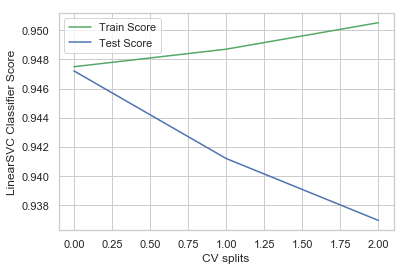

In [66]:
plt.plot([1,2,3], train_score_list, c = 'g', label = 'Train Score')
plt.plot([1,2,3], test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('LinearSVC Classifier Score')

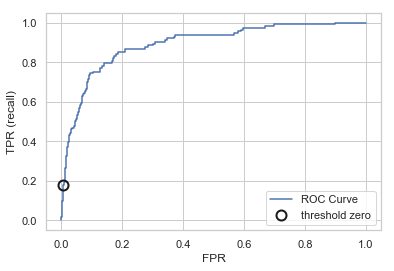

In [67]:
%matplotlib inline

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_cv, lsvc.decision_function(X_test_cv))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [68]:
pd.DataFrame(
    confusion_matrix(y_test_cv, y_test_preds),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

,Predicted Income not>50k,Predicted Income>50k
True Income not>50k,1543,10
True Income>50k,95,18


# Kernalized SVC Classifier

In [69]:
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['rbf','linear','poly'], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator = SVC(), param_grid = parameters, scoring='accuracy', cv=3, n_jobs = -1)

grid_search = grid_search.fit(X,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: 0.9438
Grid search best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


In [70]:
kf = KFold(n_splits=3) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
train_AIC_score_list = []
test_AIC_score_list = []
train_BIC_score_list = []
test_BIC_score_list = []
sensitivity_train_list = []
specificity_train_list = []
sensitivity_test_list = []
specificity_test_list = []
precision_train_positive_class = []
precision_train_negative_class = []
precision_test_positive_class = []
precision_test_negative_class = []
recall_train_positive_class = []
recall_train_negative_class = []
recall_test_positive_class = []
recall_test_negative_class = []
support_train_positive_class = []
support_train_negative_class = []
support_test_positive_class = []
support_test_negative_class = []
f1_train_score_positive_class = []
f1_train_score_negative_class = []
f1_test_score_positive_class = []
f1_test_score_negative_class = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    ksvc = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
    ksvc.fit(X_train_cv,y_train_cv)
    train_score_list.append(ksvc.score(X_train_cv,y_train_cv))
    test_score_list.append(ksvc.score(X_test_cv, y_test_cv))
    
    y_train_preds = ksvc.predict(X_train_cv)
    y_test_preds = ksvc.predict(X_test_cv)
    
    resid_train = np.array([i for i in y_train_cv.values.tolist()]) - np.array(y_train_preds.tolist())
    resid_test = np.array([i for i in y_test_cv.values.tolist()]) - np.array(y_test_preds.tolist())
    sse_train = sum(resid_train**2)
    sse_test = sum(resid_test**2)
    k = len(X.columns.tolist())
    n_train = y_train_cv.shape[0]
    n_test = y_test_cv.shape[0]

    AIC_train = (2*k) - (2*np.log(sse_train))
    BIC_train = (n_train*np.log(sse_train/n_train)) + (k*np.log(n_train))
    
    AIC_test = (2*k) - (2*np.log(sse_test))
    BIC_test = (n_test*np.log(sse_test/n_test)) + (k*np.log(n_test))
    
    train_AIC_score_list.append(AIC_train)
    train_BIC_score_list.append(BIC_train)
    test_AIC_score_list.append(AIC_test)
    test_BIC_score_list.append(BIC_test)
    
    clf_report_train = classification_report(y_train_cv,y_train_preds,output_dict=True)
    clf_report_test = classification_report(y_test_cv,y_test_preds,output_dict=True)
    
    sensitivity_train_list.append(clf_report_train['1']['recall'])
    specificity_train_list.append(clf_report_train['0']['recall'])
    sensitivity_test_list.append(clf_report_test['1']['recall'])
    specificity_test_list.append(clf_report_test['0']['recall'])
    precision_train_positive_class.append(clf_report_train['1']['precision'])
    precision_train_negative_class.append(clf_report_train['0']['precision'])
    precision_test_positive_class.append(clf_report_test['1']['precision'])
    precision_test_negative_class.append(clf_report_test['0']['precision'])
    recall_train_positive_class.append(clf_report_train['1']['recall'])
    recall_train_negative_class.append(clf_report_train['0']['recall'])
    recall_test_positive_class.append(clf_report_test['1']['recall'])
    recall_test_negative_class.append(clf_report_test['0']['recall'])
    support_train_positive_class.append(clf_report_train['1']['support'])
    support_train_negative_class.append(clf_report_train['0']['support'])
    support_test_positive_class.append(clf_report_test['1']['support'])
    support_test_negative_class.append(clf_report_test['0']['support'])
    f1_train_score_positive_class.append(clf_report_train['1']['f1-score'])
    f1_train_score_negative_class.append(clf_report_train['0']['f1-score'])
    f1_test_score_positive_class.append(clf_report_test['1']['f1-score'])
    f1_test_score_negative_class.append(clf_report_test['0']['f1-score'])

report_df = report_df.append({"Classifier":"KernalizedSVC", 
                              "Avg train accuracy":sum(train_score_list) / 3, "Avg test accuracy":sum(test_score_list) / 3, 
                              "Avg train AIC":sum(train_AIC_score_list) / 3, "Avg test AIC":sum(test_AIC_score_list) / 3, 
                              "Avg train BIC":sum(train_BIC_score_list) / 3, "Avg test BIC":sum(test_BIC_score_list) / 3, 
                              "Avg train sensitivity" : sum(sensitivity_train_list) / 3, "Avg test sensitivity" : sum(sensitivity_test_list) / 3, 
                              "Avg train specificity" : sum(specificity_train_list) / 3, "Avg test specificity" : sum(specificity_test_list) / 3,
                              "Avg train precision for positive class":sum(precision_train_positive_class) / 3, "Avg test precision for positive class":sum(precision_train_negative_class) / 3, 
                              "Avg train precision for negative class":sum(precision_test_positive_class) / 3, "Avg test precision for negative class":sum(precision_test_negative_class) / 3,
                              "Avg train recall for positive class":sum(recall_train_positive_class) / 3, "Avg test recall for positive class":sum(recall_train_negative_class) / 3, 
                              "Avg train recall for negative class":sum(recall_test_positive_class) / 3, "Avg test recall for negative class":sum(recall_test_negative_class) / 3,
                              "Avg train support for positive class":sum(support_train_positive_class) / 3, "Avg test support for positive class":sum(support_train_negative_class) / 3, 
                              "Avg train support for negative class":sum(support_test_positive_class) / 3, "Avg test support for negative class":sum(support_test_negative_class) / 3,
                              "Avg train f1-score for positive class":sum(f1_train_score_positive_class) / 3, "Avg test f1-score for positive class":sum(f1_train_score_negative_class) / 3, 
                              "Avg train f1-score for negative class":sum(f1_test_score_positive_class) / 3, "Avg test f1-score for negative class":sum(f1_test_score_negative_class) / 3,
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

In [71]:
report_df[train_columns]

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.9510,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108
1,KNNClassifier,{'n_neighbors': 9},0.9448,539.571094,-7426.871283,0.261500,0.993357,0.741443,0.522125,0.261500,0.187570,221.333333,110.666667,0.383958,0.274761
2,LinearSVC,{'C': 0.1},0.9489,539.725070,-7683.495593,0.294699,0.995393,0.820258,0.671987,0.294699,0.239456,221.333333,110.666667,0.433190,0.349408
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.9615,540.291403,-8627.371150,0.546636,0.991002,0.812042,0.600379,0.546636,0.409297,221.333333,110.666667,0.653373,0.486499


In [72]:
report_df[test_columns]

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112
1,KNNClassifier,{'n_neighbors': 9},0.934599,540.619327,-2506.982811,0.187570,0.987797,0.949823,0.944693,0.993357,0.987797,3112.0,1556.0,0.971099,0.965755
2,LinearSVC,{'C': 0.1},0.941799,540.855824,-2704.072101,0.239456,0.991865,0.952054,0.948210,0.995393,0.991865,3112.0,1556.0,0.973241,0.969533
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.942799,540.887633,-2730.575893,0.409297,0.980724,0.968491,0.958944,0.991002,0.980724,3112.0,1556.0,0.979617,0.969709


Text(0, 0.5, 'KernalizedSVC Classifier Score')

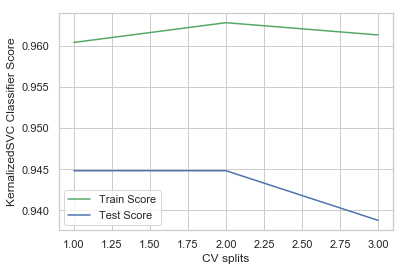

In [73]:
plt.plot([1,2,3],train_score_list, c = 'g', label = 'Train Score')
plt.plot([1,2,3],test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('KernalizedSVC Classifier Score')

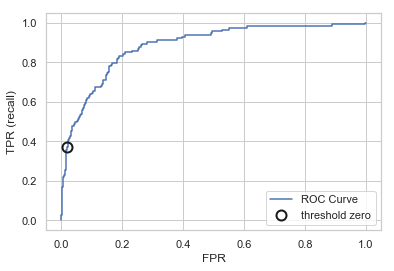

In [74]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_cv, ksvc.decision_function(X_test_cv))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [75]:
pd.DataFrame(
    confusion_matrix(y_test_cv, y_test_preds),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

,Predicted Income not>50k,Predicted Income>50k
True Income not>50k,1522,31
True Income>50k,71,42


# DecisionTree Classifier

In [76]:
parameters = [{'max_depth':np.arange(1, 21), 'min_samples_leaf':[1, 5, 10, 15, 20, 25, 50, 100]}]

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parameters, scoring='accuracy', cv=3, n_jobs = -1)

grid_search = grid_search.fit(census[features],census[target])

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: 0.944
Grid search best parameters: {'max_depth': 5, 'min_samples_leaf': 25}


In [77]:
kf = KFold(n_splits=3) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
train_AIC_score_list = []
test_AIC_score_list = []
train_BIC_score_list = []
test_BIC_score_list = []
sensitivity_train_list = []
specificity_train_list = []
sensitivity_test_list = []
specificity_test_list = []
precision_train_positive_class = []
precision_train_negative_class = []
precision_test_positive_class = []
precision_test_negative_class = []
recall_train_positive_class = []
recall_train_negative_class = []
recall_test_positive_class = []
recall_test_negative_class = []
support_train_positive_class = []
support_train_negative_class = []
support_test_positive_class = []
support_test_negative_class = []
f1_train_score_positive_class = []
f1_train_score_negative_class = []
f1_test_score_positive_class = []
f1_test_score_negative_class = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = census[features].iloc[train_index], census[features].iloc[test_index]
    y_train_cv, y_test_cv = census[target].iloc[train_index], census[target].iloc[test_index]
    
    dtc = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    dtc.fit(X_train_cv,y_train_cv)
    train_score_list.append(dtc.score(X_train_cv,y_train_cv))
    test_score_list.append(dtc.score(X_test_cv, y_test_cv))
    
    y_train_preds = dtc.predict(X_train_cv)
    y_test_preds = dtc.predict(X_test_cv)
    
    resid_train = np.array([i for i in y_train_cv.values.tolist()]) - np.array(y_train_preds.tolist())
    resid_test = np.array([i for i in y_test_cv.values.tolist()]) - np.array(y_test_preds.tolist())
    sse_train = sum(resid_train**2)
    sse_test = sum(resid_test**2)
    k = len(X.columns.tolist())
    n_train = y_train_cv.shape[0]
    n_test = y_test_cv.shape[0]

    AIC_train = (2*k) - (2*np.log(sse_train))
    BIC_train = (n_train*np.log(sse_train/n_train)) + (k*np.log(n_train))
    
    AIC_test = (2*k) - (2*np.log(sse_test))
    BIC_test = (n_test*np.log(sse_test/n_test)) + (k*np.log(n_test))
    
    train_AIC_score_list.append(AIC_train)
    train_BIC_score_list.append(BIC_train)
    test_AIC_score_list.append(AIC_test)
    test_BIC_score_list.append(BIC_test)
    
    clf_report_train = classification_report(y_train_cv,y_train_preds,output_dict=True)
    clf_report_test = classification_report(y_test_cv,y_test_preds,output_dict=True)
    
    sensitivity_train_list.append(clf_report_train['1']['recall'])
    specificity_train_list.append(clf_report_train['0']['recall'])
    sensitivity_test_list.append(clf_report_test['1']['recall'])
    specificity_test_list.append(clf_report_test['0']['recall'])
    precision_train_positive_class.append(clf_report_train['1']['precision'])
    precision_train_negative_class.append(clf_report_train['0']['precision'])
    precision_test_positive_class.append(clf_report_test['1']['precision'])
    precision_test_negative_class.append(clf_report_test['0']['precision'])
    recall_train_positive_class.append(clf_report_train['1']['recall'])
    recall_train_negative_class.append(clf_report_train['0']['recall'])
    recall_test_positive_class.append(clf_report_test['1']['recall'])
    recall_test_negative_class.append(clf_report_test['0']['recall'])
    support_train_positive_class.append(clf_report_train['1']['support'])
    support_train_negative_class.append(clf_report_train['0']['support'])
    support_test_positive_class.append(clf_report_test['1']['support'])
    support_test_negative_class.append(clf_report_test['0']['support'])
    f1_train_score_positive_class.append(clf_report_train['1']['f1-score'])
    f1_train_score_negative_class.append(clf_report_train['0']['f1-score'])
    f1_test_score_positive_class.append(clf_report_test['1']['f1-score'])
    f1_test_score_negative_class.append(clf_report_test['0']['f1-score'])

report_df = report_df.append({"Classifier":"DecisionTreeClassifier", 
                              "Avg train accuracy":sum(train_score_list) / 3, "Avg test accuracy":sum(test_score_list) / 3, 
                              "Avg train AIC":sum(train_AIC_score_list) / 3, "Avg test AIC":sum(test_AIC_score_list) / 3, 
                              "Avg train BIC":sum(train_BIC_score_list) / 3, "Avg test BIC":sum(test_BIC_score_list) / 3, 
                              "Avg train sensitivity" : sum(sensitivity_train_list) / 3, "Avg test sensitivity" : sum(sensitivity_test_list) / 3, 
                              "Avg train specificity" : sum(specificity_train_list) / 3, "Avg test specificity" : sum(specificity_test_list) / 3,
                              "Avg train precision for positive class":sum(precision_train_positive_class) / 3, "Avg test precision for positive class":sum(precision_train_negative_class) / 3, 
                              "Avg train precision for negative class":sum(precision_test_positive_class) / 3, "Avg test precision for negative class":sum(precision_test_negative_class) / 3,
                              "Avg train recall for positive class":sum(recall_train_positive_class) / 3, "Avg test recall for positive class":sum(recall_train_negative_class) / 3, 
                              "Avg train recall for negative class":sum(recall_test_positive_class) / 3, "Avg test recall for negative class":sum(recall_test_negative_class) / 3,
                              "Avg train support for positive class":sum(support_train_positive_class) / 3, "Avg test support for positive class":sum(support_train_negative_class) / 3, 
                              "Avg train support for negative class":sum(support_test_positive_class) / 3, "Avg test support for negative class":sum(support_test_negative_class) / 3,
                              "Avg train f1-score for positive class":sum(f1_train_score_positive_class) / 3, "Avg test f1-score for positive class":sum(f1_train_score_negative_class) / 3, 
                              "Avg train f1-score for negative class":sum(f1_test_score_positive_class) / 3, "Avg test f1-score for negative class":sum(f1_test_score_negative_class) / 3,
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

In [78]:
report_df[train_columns]

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.9510,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108
1,KNNClassifier,{'n_neighbors': 9},0.9448,539.571094,-7426.871283,0.261500,0.993357,0.741443,0.522125,0.261500,0.187570,221.333333,110.666667,0.383958,0.274761
2,LinearSVC,{'C': 0.1},0.9489,539.725070,-7683.495593,0.294699,0.995393,0.820258,0.671987,0.294699,0.239456,221.333333,110.666667,0.433190,0.349408
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.9615,540.291403,-8627.371150,0.546636,0.991002,0.812042,0.600379,0.546636,0.409297,221.333333,110.666667,0.653373,0.486499
4,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 25}",0.9473,539.663280,-7580.506536,0.356198,0.989285,0.711225,0.626021,0.356198,0.326321,221.333333,110.666667,0.471065,0.425832


In [79]:
report_df[test_columns]

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112
1,KNNClassifier,{'n_neighbors': 9},0.934599,540.619327,-2506.982811,0.187570,0.987797,0.949823,0.944693,0.993357,0.987797,3112.0,1556.0,0.971099,0.965755
2,LinearSVC,{'C': 0.1},0.941799,540.855824,-2704.072101,0.239456,0.991865,0.952054,0.948210,0.995393,0.991865,3112.0,1556.0,0.973241,0.969533
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.942799,540.887633,-2730.575893,0.409297,0.980724,0.968491,0.958944,0.991002,0.980724,3112.0,1556.0,0.979617,0.969709
4,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 25}",0.942000,540.858346,-2706.148319,0.326321,0.985870,0.955825,0.953601,0.989285,0.985870,3112.0,1556.0,0.972259,0.969453


Text(0, 0.5, 'DecisionTree Classifier Score')

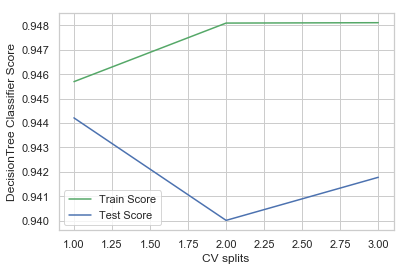

In [80]:
plt.plot([1,2,3],train_score_list, c = 'g', label = 'Train Score')
plt.plot([1,2,3],test_score_list, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('CV splits')
plt.ylabel('DecisionTree Classifier Score')

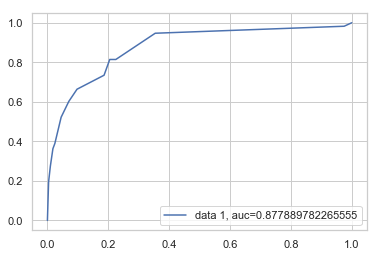

In [81]:
y_pred_proba = dtc.predict_proba(X_test_cv)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_cv,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_cv, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [82]:
pd.DataFrame(
    confusion_matrix(y_test_cv, y_test_preds),
    columns=['Predicted Income not>50k', 'Predicted Income>50k'],
    index=['True Income not>50k', 'True Income>50k']
)

,Predicted Income not>50k,Predicted Income>50k
True Income not>50k,1538,15
True Income>50k,82,31


# Evaluation parameters report for train set.

In [89]:
report_df[train_columns].sort_values(by=["Avg train precision for positive class", "Avg train recall for positive class", "Avg train accuracy"], ascending=False)

,Classifier,Best Hyperparameters,Avg train accuracy,Avg train AIC,Avg train BIC,Avg train sensitivity,Avg train specificity,Avg train precision for positive class,Avg train precision for negative class,Avg train recall for positive class,Avg train recall for negative class,Avg train support for positive class,Avg train support for negative class,Avg train f1-score for positive class,Avg train f1-score for negative class
2,LinearSVC,{'C': 0.1},0.9489,539.725070,-7683.495593,0.294699,0.995393,0.820258,0.671987,0.294699,0.239456,221.333333,110.666667,0.433190,0.349408
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.9615,540.291403,-8627.371150,0.546636,0.991002,0.812042,0.600379,0.546636,0.409297,221.333333,110.666667,0.653373,0.486499
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.9510,539.810174,-7825.344602,0.353453,0.993464,0.794353,0.690676,0.353453,0.309779,221.333333,110.666667,0.488869,0.426108
1,KNNClassifier,{'n_neighbors': 9},0.9448,539.571094,-7426.871283,0.261500,0.993357,0.741443,0.522125,0.261500,0.187570,221.333333,110.666667,0.383958,0.274761
4,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 25}",0.9473,539.663280,-7580.506536,0.356198,0.989285,0.711225,0.626021,0.356198,0.326321,221.333333,110.666667,0.471065,0.425832


# Evaluation parameters report for test set.

In [90]:
report_df[test_columns].sort_values(by=["Avg test precision for positive class", "Avg test recall for positive class", "Avg test accuracy"], ascending=False)

,Classifier,Best Hyperparameters,Avg test accuracy,Avg test AIC,Avg test BIC,Avg test sensitivity,Avg test specificity,Avg test precision for positive class,Avg test precision for negative class,Avg test recall for positive class,Avg test recall for negative class,Avg test support for positive class,Avg test support for negative class,Avg test f1-score for positive class,Avg test f1-score for negative class
3,KernalizedSVC,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}",0.942799,540.887633,-2730.575893,0.409297,0.980724,0.968491,0.958944,0.991002,0.980724,3112.0,1556.0,0.979617,0.969709
4,DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_leaf': 25}",0.942000,540.858346,-2706.148319,0.326321,0.985870,0.955825,0.953601,0.989285,0.985870,3112.0,1556.0,0.972259,0.969453
0,LogisticRegression,"{'C': 0.8, 'penalty': 'l1'}",0.944999,540.965681,-2795.611794,0.309779,0.990156,0.955791,0.952803,0.993464,0.990156,3112.0,1556.0,0.974263,0.971112
2,LinearSVC,{'C': 0.1},0.941799,540.855824,-2704.072101,0.239456,0.991865,0.952054,0.948210,0.995393,0.991865,3112.0,1556.0,0.973241,0.969533
1,KNNClassifier,{'n_neighbors': 9},0.934599,540.619327,-2506.982811,0.187570,0.987797,0.949823,0.944693,0.993357,0.987797,3112.0,1556.0,0.971099,0.965755


# Model evaluation strategy and conclusion

Before discussing which evaluation strategy we should choose lets look at what Precision, Recall and Accuracy of the model mean .<br /><br />

Precision - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.<br /><br />

Recall - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.<br /><br />

Accuracy - Accuracy is the fraction of predictions our model got right.<br /><br /><br />


We decide our evaluation strategy as Precision and Recall value for the positive class in our data set and then thirdly the accuracy. The reason for choosing Precision and Recall over Accuracy is because our dataset is highly imbalanced with respect to the target variable INCOME. Only 6.63% of the labels have positive class. So due to less number of positive class samples it is not reliable to choose accuracy.<br /><br />

We will choose testing data results to determine best model for the dataset.<br />

From above evaluation report of test datasets we can see that KernalizedSVC gives best precision and recall. <br /><br />
So the winning model here is <b>KernalizedSVC</b>.